### Modes of Information Flow analysis code

In the first part I upgrade dit package for Python. This package has many functions to compute measures for discrete information theory problems.

In [56]:
# Install the upgrade from git
#!pip install --user --upgrade git+git://github.com/dit/dit.git#egg=dit

**Step 1**

To work with this code correctly we need to import all the packages needed in Python. We also load the dataset which contains time series constructed as the average of the emotions expressed on Twitter in time slots of five minutes during the 24 hours after the earthquake, therefore, every time series has 288 values. Because we are using a package for discrete information theory (dit) the time series where dichotomized, the criteria used was 1 was assigned for values greater than the median, and 0 otherwise for each time series.

In [57]:
# Import the packages numpy, matplotlib, dit, collections, and pandas needed to run the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import namedtuple
from itertools import permutations

import dit
from dit.inference import binned, dist_from_timeseries
from dit.multivariate import total_correlation as I, intrinsic_total_correlation as IMI

dit.ditParams['repr.print'] = True

In [58]:
#Import the dataset
dataset = pd.read_csv('earthquakedata_dich.csv', encoding='utf-8')

#Print dataset
dataset

,sadness,anger,fear,disgust,joy,sadness_dich,anger_dich,fear_dich,disgust_dich,joy_dich
0,0.162649,0.137207,0.065900,0.014342,0.178080,1,1,1,0,1
1,0.154200,0.162913,0.061809,0.017641,0.145686,0,1,0,0,1
2,0.134369,0.131008,0.057596,0.027222,0.177402,0,1,0,0,1
3,0.185977,0.068172,0.045904,0.018430,0.205039,1,1,0,0,1
4,0.177835,0.042975,0.031071,0.039012,0.226750,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
283,0.132210,0.045497,0.098556,0.030217,0.182622,0,0,1,0,1
284,0.182335,0.101294,0.124704,0.031984,0.111595,1,1,1,0,0
285,0.180883,0.061389,0.067752,0.044968,0.119976,1,1,1,1,0
286,0.129512,0.043418,0.087818,0.033160,0.161766,0,0,1,0,1


**Step 2**

The package dit has defined functions to compute the intrinsic mutual information (IMI), the time-delayed mutual information, and the transfer entropy. Shared and synergistic flows are defined using algebra and the previous measures.

In [59]:
#Definition of the tuple to save the Modes of Information Flow
Flows = namedtuple('Flows', ['intrinsic', 'shared', 'synergistic'])

#Function to compute the Modes of Information Flow
def get_flows(ts, length):

    d = dist_from_timeseries(ts, history_length=length)

    i_past, j_past, i_pres, j_pres = [0], [1], [2], [3]

    intrinsic = IMI(d, [i_past, j_pres], j_past)
    shared = I(d, [i_past, j_pres]) - intrinsic
    synergistic = I(d, [i_past, j_pres], j_past) - intrinsic

    return Flows(intrinsic, shared, synergistic)

In [60]:
#Creation of numpy array to compute flows of information
emotions = dataset[['sadness_dich','anger_dich','fear_dich','disgust_dich', 'joy_dich']].to_numpy()

#Checking shape of new dataset
np.shape(emotions)

(288, 5)

In [61]:
#Creation of the list of all possible permutations to compute all pairwise information flows for the five emotions
# 0=sadness, 1=anger, 2=fear, 3=disgust, 4=joy
a = [0, 1, 2, 3, 4]
perms = list(permutations(a,2))

In [62]:
#Computation of all flows of information
intrinsic_calc = []
shared_calc = []
synergistic_calc = []

#For cycle for all the pairwise information flows
for pair in perms:
    timeseries = emotions[:,pair]
    flows = get_flows(timeseries, 1)
    intrinsic_calc.append(flows[0])
    shared_calc.append(flows[1])
    synergistic_calc.append(flows[2])

**Step 3**

Here we calculate all the pairwise modes of information flow.

In [63]:
#Calculation of Modes of Information Flow
df = pd.DataFrame({'Pairs':perms, 'Intrinsic':intrinsic_calc, 'Shared':shared_calc, 'Synergistic':synergistic_calc})

#If you want to save the results
#df.to_csv('results.csv')
df

,Pairs,Intrinsic,Shared,Synergistic
0,"(0, 1)",0.000219,0.000000e+00,5.933463e-04
1,"(0, 2)",0.032841,2.220446e-16,1.542320e-02
2,"(0, 3)",0.001481,0.000000e+00,8.657495e-04
3,"(0, 4)",0.006392,0.000000e+00,4.478007e-03
4,"(1, 0)",0.000219,0.000000e+00,7.370048e-04
5,"(1, 2)",0.003839,4.591370e-03,-1.110223e-16
6,"(1, 3)",0.000079,2.220446e-16,5.636770e-03
7,"(1, 4)",0.000009,-2.220446e-16,6.649098e-04
8,"(2, 0)",0.013359,0.000000e+00,2.471128e-02
9,"(2, 1)",0.006351,3.209198e-03,-1.110223e-16


**Step 4**

Finally to have a visual perspective we plot the modes of information flow for the five emotions.

In [64]:
#Extraction of Sadness data
x_int_sadness = list(df['Intrinsic'][0:4])
y_int_sadness = [df['Intrinsic'][4],df['Intrinsic'][8],df['Intrinsic'][12],df['Intrinsic'][16]]
x_shared_sadness = list(df['Shared'][0:4])
y_shared_sadness = [df['Shared'][4],df['Shared'][8],df['Shared'][12],df['Shared'][16]]
x_synergistic_sadness = list(df['Synergistic'][0:4])
y_synergistic_sadness = [df['Synergistic'][4],df['Synergistic'][8],df['Synergistic'][12],df['Synergistic'][16]]

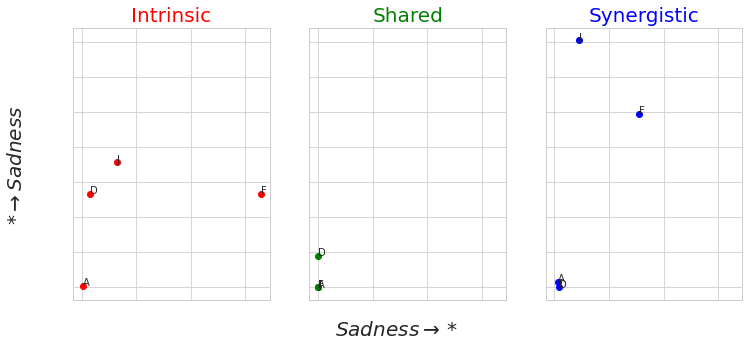

In [65]:
#Plots of Sadness

plt.style.use('seaborn-whitegrid')
#plt.figure(figsize=(10,5))

n = ['A','F','D','J']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(12,5))

fig.text(0.5, 0.04, r'$Sadness \rightarrow *$', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, r'$* \rightarrow Sadness$', ha='center', va='center', rotation='vertical', fontsize=20)

ax1.title.set_text('Intrinsic')
ax1.title.set_color('red')
ax1.title.set_fontsize(20)
ax1.scatter(x_int_sadness, y_int_sadness, color='red')
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
for i, txt in enumerate(n):
    ax1.annotate(txt, (x_int_sadness[i], y_int_sadness[i]))

ax2.title.set_text('Shared')
ax2.title.set_color('green')
ax2.title.set_fontsize(20)
ax2.scatter(x_shared_sadness, y_shared_sadness, color='green')
for i, txt in enumerate(n):
    ax2.annotate(txt, (x_shared_sadness[i], y_shared_sadness[i]))

ax3.title.set_text('Synergistic')
ax3.title.set_color('blue')
ax3.title.set_fontsize(20)
ax3.scatter(x_synergistic_sadness, y_synergistic_sadness, color='blue')
for i, txt in enumerate(n):
    ax3.annotate(txt, (x_synergistic_sadness[i], y_synergistic_sadness[i]))

plt.show()

In [66]:
#Extraction of Anger data
x_int_anger = list(df['Intrinsic'][4:8])
y_int_anger = [df['Intrinsic'][0],df['Intrinsic'][9],df['Intrinsic'][13],df['Intrinsic'][17]]
x_shared_anger = list(df['Shared'][4:8])
y_shared_anger = [df['Shared'][0],df['Shared'][9],df['Shared'][13],df['Shared'][17]]
x_synergistic_anger = list(df['Synergistic'][4:8])
y_synergistic_anger = [df['Synergistic'][0],df['Synergistic'][9],df['Synergistic'][13],df['Synergistic'][17]]

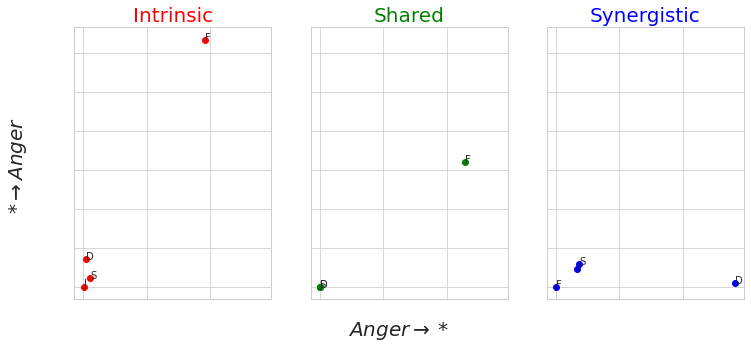

In [67]:
#Plots of Anger
plt.style.use('seaborn-whitegrid')

n = ['S','F','D','J']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(12,5))

fig.text(0.5, 0.04, r'$Anger \rightarrow *$', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, r'$* \rightarrow Anger$', ha='center', va='center', rotation='vertical', fontsize=20)

ax1.title.set_text('Intrinsic')
ax1.title.set_color('red')
ax1.title.set_fontsize(20)
ax1.scatter(x_int_anger, y_int_anger, color='red')
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
for i, txt in enumerate(n):
    ax1.annotate(txt, (x_int_anger[i], y_int_anger[i]))

ax2.title.set_text('Shared')
ax2.title.set_color('green')
ax2.title.set_fontsize(20)
ax2.scatter(x_shared_anger, y_shared_anger, color='green')
for i, txt in enumerate(n):
    ax2.annotate(txt, (x_shared_anger[i], y_shared_anger[i]))

ax3.title.set_text('Synergistic')
ax3.title.set_color('blue')
ax3.title.set_fontsize(20)
ax3.scatter(x_synergistic_anger, y_synergistic_anger, color='blue')
for i, txt in enumerate(n):
    ax3.annotate(txt, (x_synergistic_anger[i], y_synergistic_anger[i]))

plt.show()

In [68]:
#Extraction of Fear data
x_int_fear = list(df['Intrinsic'][8:12])
y_int_fear = [df['Intrinsic'][1],df['Intrinsic'][5],df['Intrinsic'][14],df['Intrinsic'][18]]
x_shared_fear = list(df['Shared'][8:12])
y_shared_fear = [df['Shared'][1],df['Shared'][5],df['Shared'][14],df['Shared'][18]]
x_synergistic_fear = list(df['Synergistic'][8:12])
y_synergistic_fear = [df['Synergistic'][1],df['Synergistic'][5],df['Synergistic'][14],df['Synergistic'][18]]

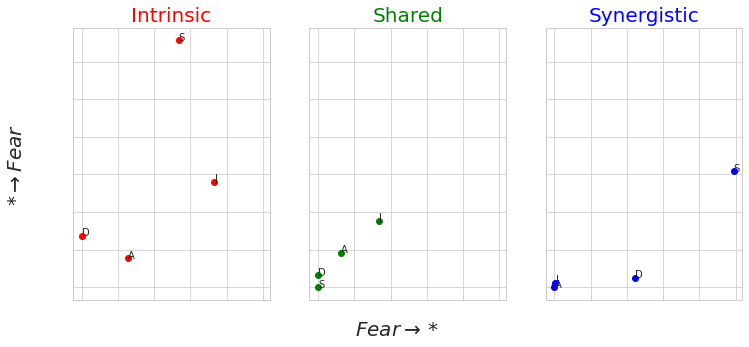

In [69]:
#Fear plots

plt.style.use('seaborn-whitegrid')

n = ['S','A','D','J']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(12,5))

fig.text(0.5, 0.04, r'$Fear \rightarrow *$', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, r'$* \rightarrow Fear$', ha='center', va='center', rotation='vertical', fontsize=20)

ax1.title.set_text('Intrinsic')
ax1.title.set_color('red')
ax1.title.set_fontsize(20)
ax1.scatter(x_int_fear, y_int_fear, color='red')
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
for i, txt in enumerate(n):
    ax1.annotate(txt, (x_int_fear[i], y_int_fear[i]))

ax2.title.set_text('Shared')
ax2.title.set_color('green')
ax2.title.set_fontsize(20)
ax2.scatter(x_shared_fear, y_shared_fear, color='green')
for i, txt in enumerate(n):
    ax2.annotate(txt, (x_shared_fear[i], y_shared_fear[i]))

ax3.title.set_text('Synergistic')
ax3.title.set_color('blue')
ax3.title.set_fontsize(20)
ax3.scatter(x_synergistic_fear, y_synergistic_fear, color='blue')
for i, txt in enumerate(n):
    ax3.annotate(txt, (x_synergistic_fear[i], y_synergistic_fear[i]))

plt.show()

In [70]:
#Extraction of Disgust data
x_int_disgust = list(df['Intrinsic'][12:16])
y_int_disgust = [df['Intrinsic'][2],df['Intrinsic'][6],df['Intrinsic'][10],df['Intrinsic'][19]]
x_shared_disgust = list(df['Shared'][12:16])
y_shared_disgust = [df['Shared'][2],df['Shared'][6],df['Shared'][10],df['Shared'][19]]
x_synergistic_disgust = list(df['Synergistic'][12:16])
y_synergistic_disgust = [df['Synergistic'][2],df['Synergistic'][6],df['Synergistic'][10],df['Synergistic'][19]]

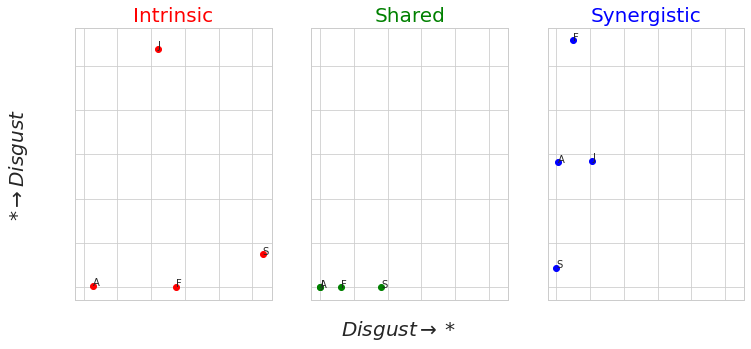

In [71]:
#Plots of Disgust

plt.style.use('seaborn-whitegrid')

n = ['S','A','F','J']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(12,5))

fig.text(0.5, 0.04, r'$Disgust \rightarrow *$', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, r'$* \rightarrow Disgust$', ha='center', va='center', rotation='vertical', fontsize=20)

ax1.title.set_text('Intrinsic')
ax1.title.set_color('red')
ax1.title.set_fontsize(20)
ax1.scatter(x_int_disgust, y_int_disgust, color='red')
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
for i, txt in enumerate(n):
    ax1.annotate(txt, (x_int_disgust[i], y_int_disgust[i]))

ax2.title.set_text('Shared')
ax2.title.set_color('green')
ax2.title.set_fontsize(20)
ax2.scatter(x_shared_disgust, y_shared_disgust, color='green')
for i, txt in enumerate(n):
    ax2.annotate(txt, (x_shared_disgust[i], y_shared_disgust[i]))

ax3.title.set_text('Synergistic')
ax3.title.set_color('blue')
ax3.title.set_fontsize(20)
ax3.scatter(x_synergistic_disgust, y_synergistic_disgust, color='blue')
for i, txt in enumerate(n):
    ax3.annotate(txt, (x_synergistic_disgust[i], y_synergistic_disgust[i]))

plt.show()

In [72]:
#Extraction of Joy data
x_int_joy = list(df['Intrinsic'][16:20])
y_int_joy = [df['Intrinsic'][3],df['Intrinsic'][7],df['Intrinsic'][11],df['Intrinsic'][15]]
x_shared_joy = list(df['Shared'][16:20])
y_shared_joy = [df['Shared'][3],df['Shared'][7],df['Shared'][11],df['Shared'][15]]
x_synergistic_joy = list(df['Synergistic'][16:20])
y_synergistic_joy = [df['Synergistic'][3],df['Synergistic'][7],df['Synergistic'][11],df['Synergistic'][15]]

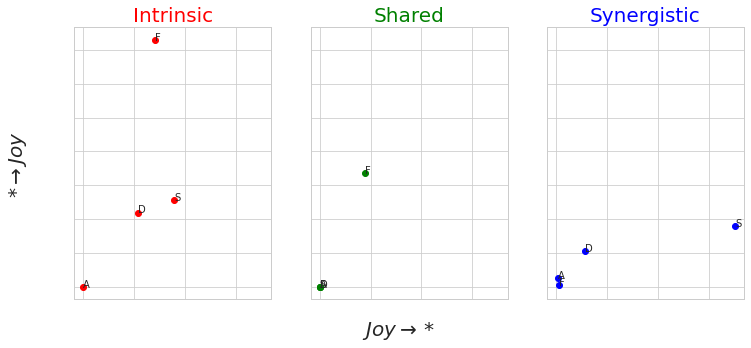

In [73]:
#Plots of Joy

plt.style.use('seaborn-whitegrid')

n = ['S','A','F','D']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(12,5))

fig.text(0.5, 0.04, r'$Joy \rightarrow *$', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, r'$* \rightarrow Joy$', ha='center', va='center', rotation='vertical', fontsize=20)

ax1.title.set_text('Intrinsic')
ax1.title.set_color('red')
ax1.title.set_fontsize(20)
ax1.scatter(x_int_joy, y_int_joy, color='red')
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
for i, txt in enumerate(n):
    ax1.annotate(txt, (x_int_joy[i], y_int_joy[i]))

ax2.title.set_text('Shared')
ax2.title.set_color('green')
ax2.title.set_fontsize(20)
ax2.scatter(x_shared_joy, y_shared_joy, color='green')
for i, txt in enumerate(n):
    ax2.annotate(txt, (x_shared_joy[i], y_shared_joy[i]))

ax3.title.set_text('Synergistic')
ax3.title.set_color('blue')
ax3.title.set_fontsize(20)
ax3.scatter(x_synergistic_joy, y_synergistic_joy, color='blue')
for i, txt in enumerate(n):
    ax3.annotate(txt, (x_synergistic_joy[i], y_synergistic_joy[i]))

plt.show()